# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


/var/folders/j8/mz7l4_197pn37cbb5wq5lgw40000gn/T/ipykernel_29213/3003710223.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sum = data.groupby(['year']).agg('sum').reset_index()


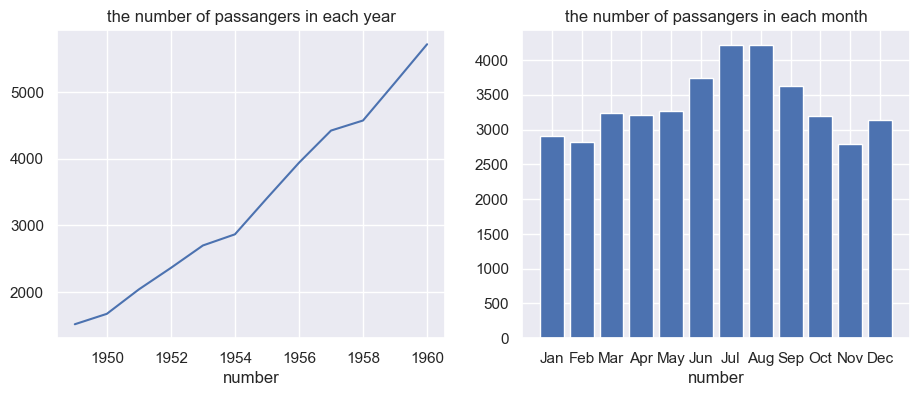

In [3]:
sns.set()

fig = plt.figure(figsize=(11,4))

year_sum = data.groupby(['year']).agg('sum').reset_index()
month_sum = data[['month', 'passengers']].groupby(['month']).agg('sum').reset_index()


plt.subplot(1,2,1)

x1 = year_sum.year
y1 = year_sum.passengers
plt.plot(x1, y1)
plt.xlabel('year')
plt.xlabel('number')
plt.title('the number of passangers in each year')

plt.subplot(1,2,2)

x2 = month_sum.month
y2 = month_sum.passengers

plt.bar(x2, y2)
plt.xlabel('month')
plt.xlabel('number')
plt.title('the number of passangers in each month')

plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


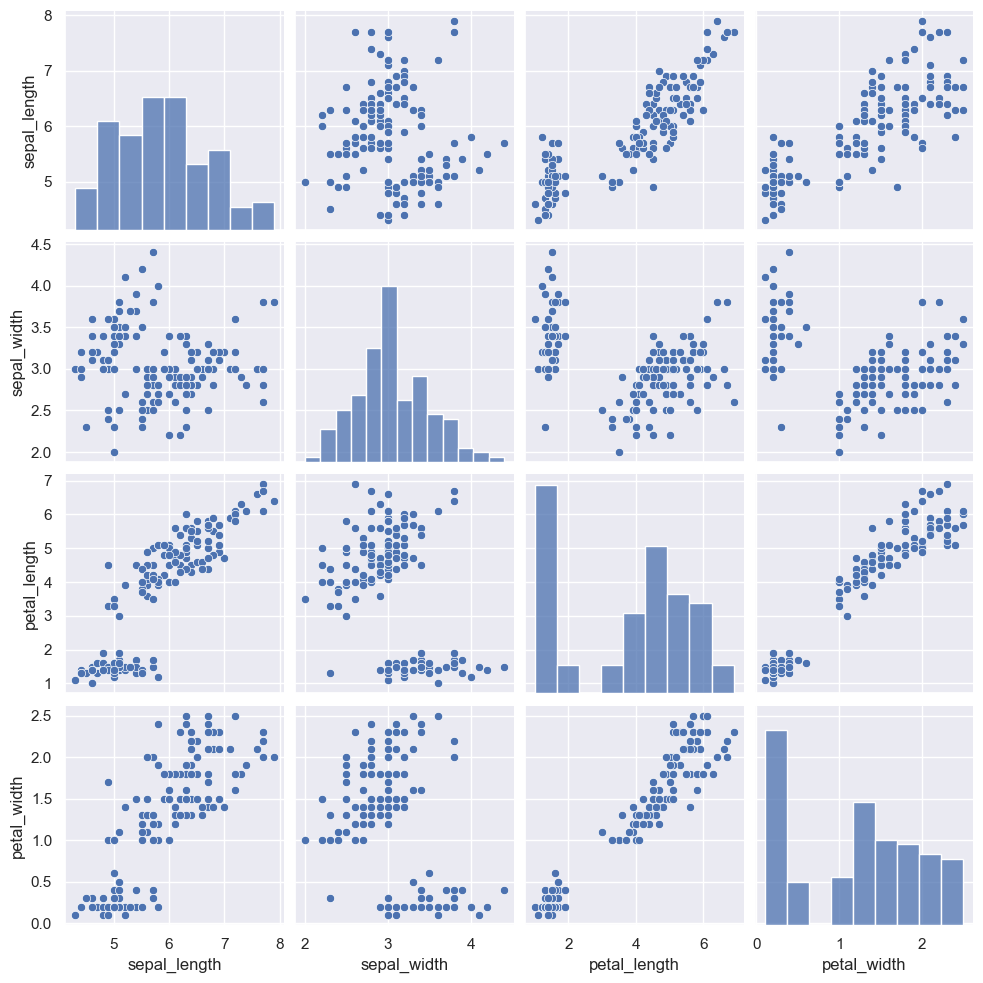

In [5]:
sns.pairplot(data)

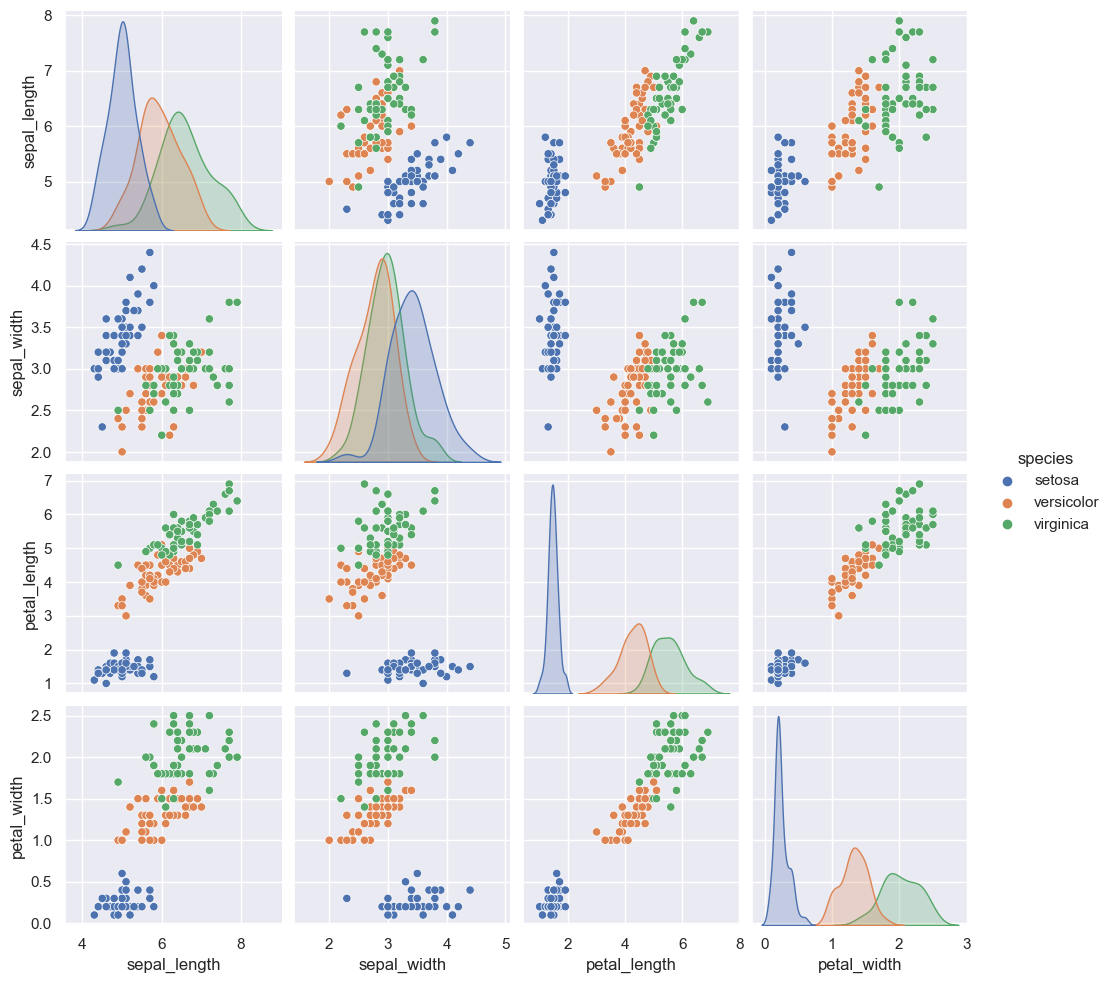

In [13]:
# sns.pairplot(data, hue='species', diag_kind='hist')
sns.pairplot(data, hue='species', diag_kind='auto')

In [14]:
grouped = data.groupby('species')

for name, group in grouped:
    print(name)
    
data_1 = grouped.get_group('setosa')
data_2 = grouped.get_group('versicolor')
data_3 = grouped.get_group('virginica')

setosa
versicolor
virginica


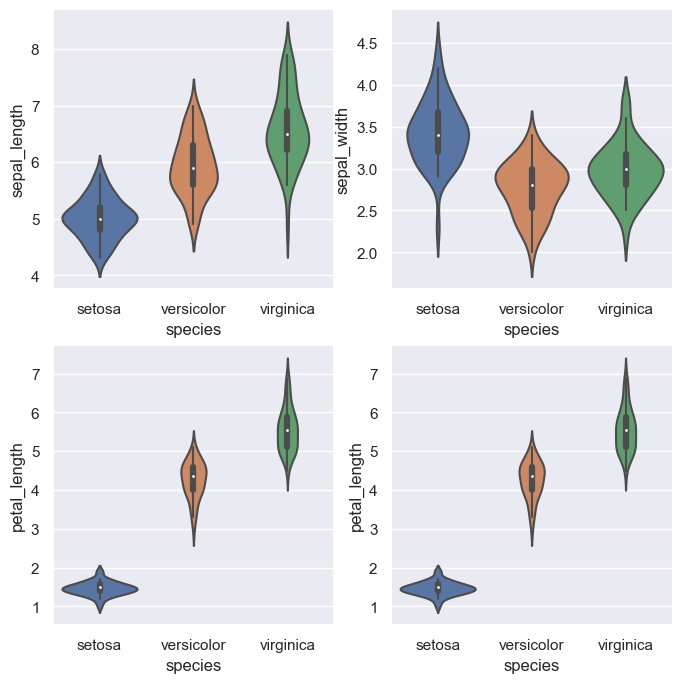

In [20]:
fig = plt.figure(figsize=(8,8))


plt.subplot(2,2,1)
sns.violinplot(data, x='species', y='sepal_length')

plt.subplot(2,2,2)
sns.violinplot(data, x='species', y='sepal_width')

plt.subplot(2,2,3)
sns.violinplot(data, x='species', y='petal_length')

plt.subplot(2,2,4)
sns.violinplot(data, x='species', y='petal_length')

plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [21]:
data_F = sns.load_dataset("tips")
data_F.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


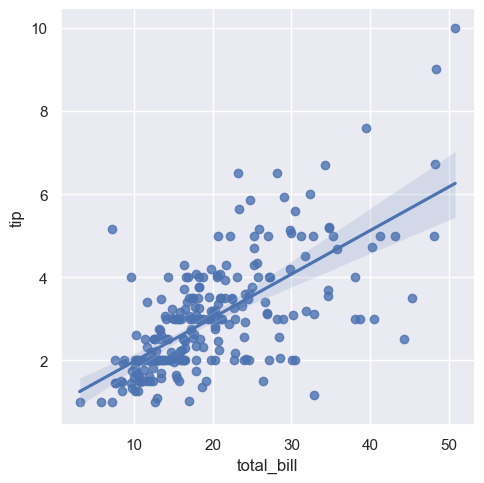

In [25]:
sns.lmplot(data_F, x='total_bill', y='tip')

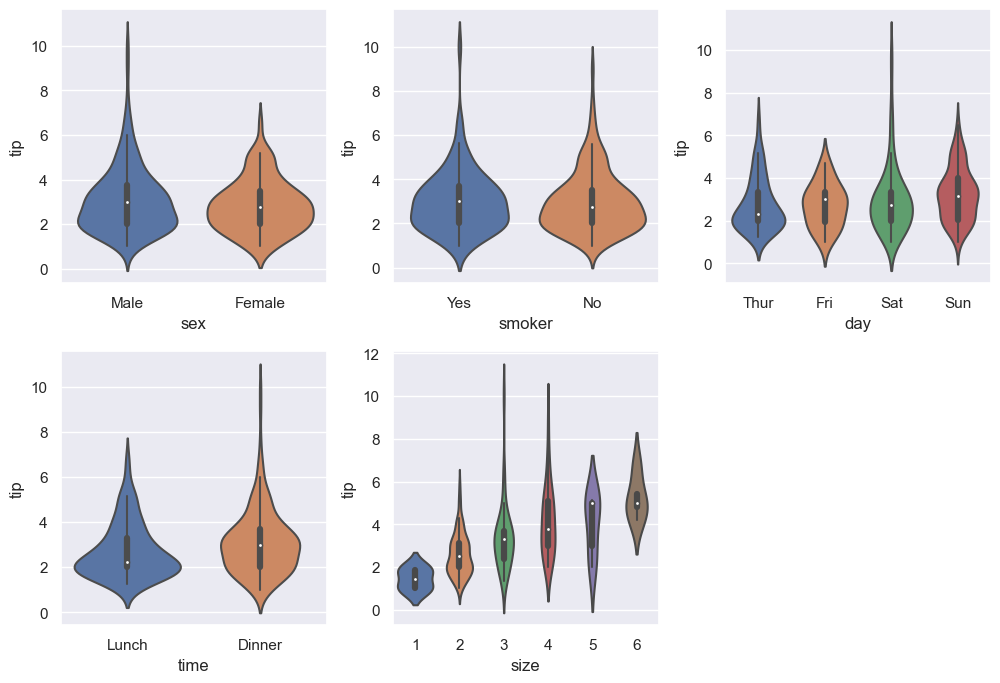

In [30]:
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.subplot(2,3,1)
sns.violinplot(data_F, x='sex', y='tip')

plt.subplot(2,3,2)
sns.violinplot(data_F, x='smoker', y='tip')

plt.subplot(2,3,3)
sns.violinplot(data_F, x='day', y='tip')

plt.subplot(2,3,4)
sns.violinplot(data_F, x='time', y='tip')

plt.subplot(2,3,5)
sns.violinplot(data_F, x='size', y='tip')


plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip'>

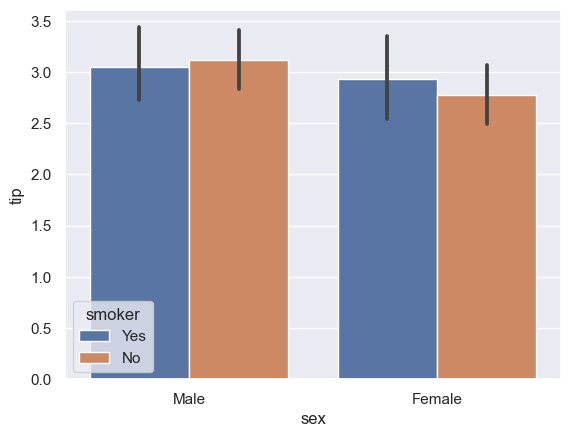

In [34]:
sns.barplot(data_F, x='sex', y='tip', hue='smoker')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [73]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
def check_bool(x):
    if x == 'yes': return 1
    elif x=='no': return 0
    else: return 'Error'

data.loc[:,'check'] = data.alive.map(lambda x: check_bool(x))

print((np.array(data[['survived']]) == np.array(data[['check']])).all())

True


In [38]:
def stat_data(data, group_by_which):
    stat = data[[group_by_which, 'survived']].groupby(group_by_which).agg('sum')
    stat['total'] = data[[group_by_which, 'survived']].groupby(group_by_which).agg('count')
    stat['unsurvived'] = stat['total'] - stat['survived']
    stat['survived_prop'] = stat['survived']/stat['total']
    stat['unsurvived_prop'] = stat['unsurvived']/stat['total']
    return stat

stat_class = stat_data(data, 'pclass')
stat_sex = stat_data(data, 'sex')

print(stat_class.head())
print(' ')
print(stat_sex.head())

        survived  total  unsurvived  survived_prop  unsurvived_prop
pclass                                                             
1            136    216          80       0.629630         0.370370
2             87    184          97       0.472826         0.527174
3            119    491         372       0.242363         0.757637
 
        survived  total  unsurvived  survived_prop  unsurvived_prop
sex                                                                
female       233    314          81       0.742038         0.257962
male         109    577         468       0.188908         0.811092


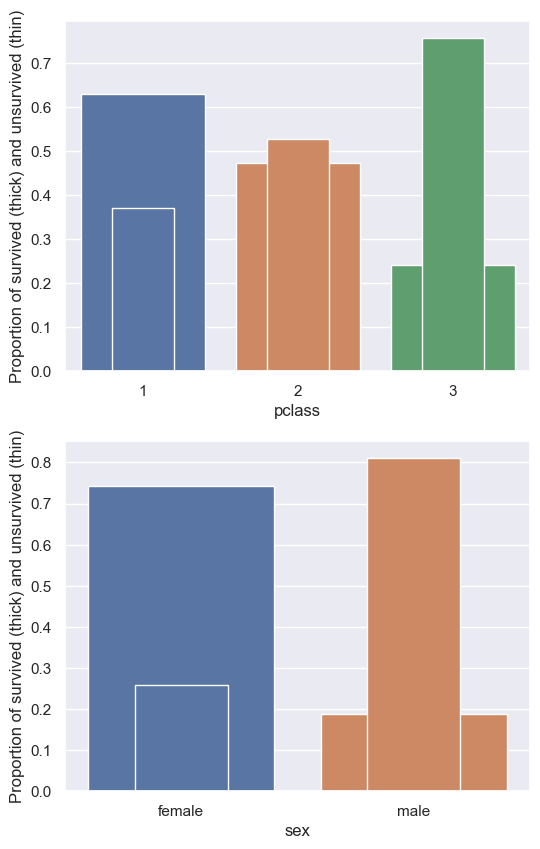

In [49]:
fig = plt.figure(figsize = (6,10))    

plt.subplot(2,1,1)
sns.barplot(stat_class.reset_index(), x='pclass', y='survived_prop')
sns.barplot(stat_class.reset_index(), x='pclass', y='unsurvived_prop', width = 0.4)

plt.ylabel('Proportion of survived (thick) and unsurvived (thin)')


plt.subplot(2,1,2)
sns.barplot(stat_sex.reset_index(), x='sex', y='survived_prop')
sns.barplot(stat_sex.reset_index(), x='sex', y='unsurvived_prop', width = 0.4)

plt.ylabel('Proportion of survived (thick) and unsurvived (thin)')

plt.show()

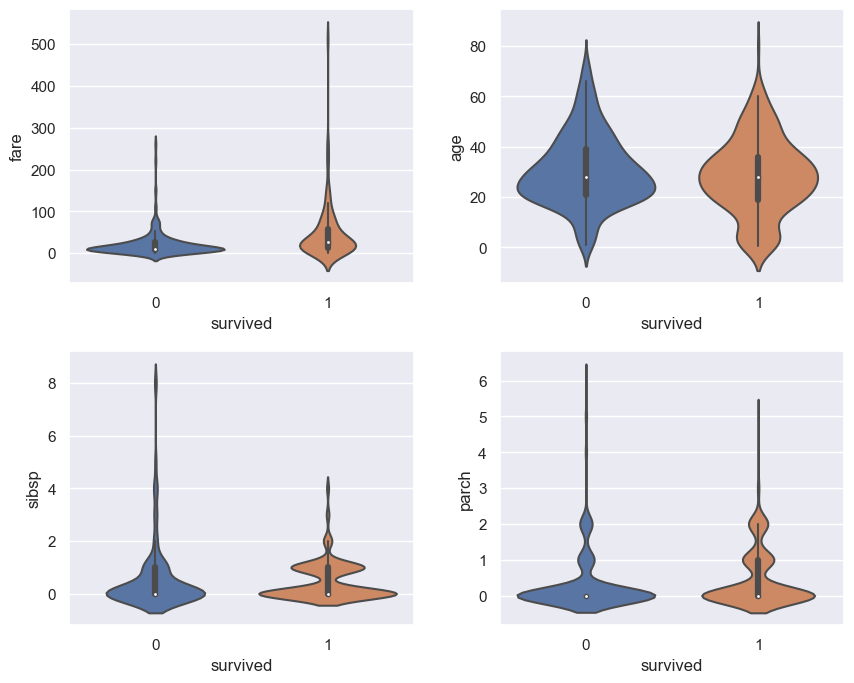

In [50]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.subplot(2,2,1)
sns.violinplot(data, x='survived', y='fare')

plt.subplot(2,2,2)
sns.violinplot(data, x='survived', y='age')

plt.subplot(2,2,3)
sns.violinplot(data, x='survived', y='sibsp')

plt.subplot(2,2,4)
sns.violinplot(data, x='survived', y='parch')


plt.show()

In [24]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title, location = 'upper right'):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = location)

In [74]:
data[(data['pclass']==2) & (data['embarked']=='S')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
15,1,2,female,55.0,0,0,16.0,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0,S,Second,man,True,D,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,0,2,male,24.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True
865,1,2,female,42.0,0,0,13.0,S,Second,woman,False,NaN,Southampton,yes,True
880,1,2,female,25.0,0,1,26.0,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='embarked', ylabel='count'>

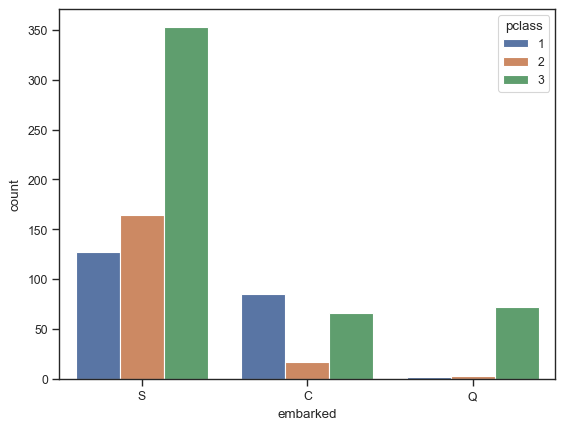

In [87]:
sns.set()
sns.set_context('paper') 
sns.set_style('ticks')
sns.countplot(data, x='embarked', hue='pclass')

<AxesSubplot:xlabel='alone', ylabel='count'>

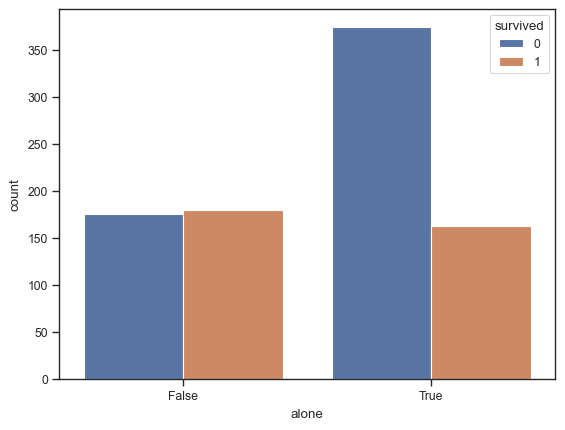

In [76]:
sns.set()
sns.set_context('paper') 
sns.set_style('ticks')
sns.countplot(data, x='alone', hue='survived')